## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edf
from edf import ops, params

## Problem Setup

best (m, b): 3.813, 3.18


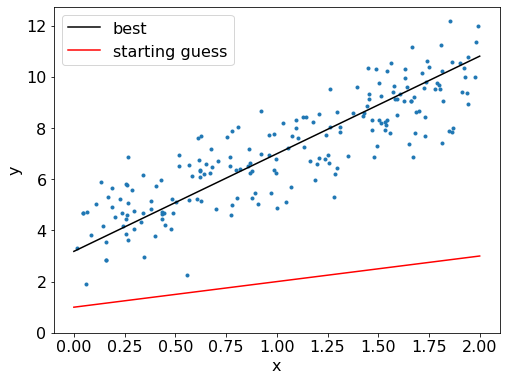

In [2]:
N = 200
xscale = 2
X = xscale * np.random.rand(N, 1)
m_true = 3 # true slope
b_true = 4 # true intercept
Y = m_true * X + b_true + np.random.randn(N, 1)

# solving for slope and intercept using linear algebra
X_b = np.hstack([np.ones((N, 1)), X]) 
m_best, b_best = np.linalg.inv(X_b.T @ X_b ) @ X_b.T @ Y
print("best (m, b): {:.3f}, {:.2f}".format(m_best[0], b_best[0]))

x_ = np.array([0, xscale])
y_ = m_best * x_ + b_best

m_guess = 1
b_guess = 1
guess = m_guess * x_ + b_guess

plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': '16'})
plt.scatter(X, Y, marker='.')
plt.plot(x_, y_, c='k', label='best')
plt.plot(x_, guess, c='r', label='starting guess')
plt.ylim([0, None])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [3]:
x = edf.Value()
y = edf.Value()

m = edf.Param()
b = edf.Param()

In [4]:
# model
# equation of a line: f(x) = m*x + b
model = edf.matmul(x, m)
model = edf.add(model, b)

In [5]:
class mse:
    def __init__(self, x, y):
        ops.append(self)
        self.x = x
        self.y = y

    def forward(self):
        error = (self.x.top - self.y.top)**2
        self.top = np.mean(error)

    def backward(self):
        if self.x in ops or self.x in params:
            self.x.grad = self.x.grad + self.grad * 2 * np.sum(self.x.top - self.y.top) / np.float32(np.prod(self.x.top.shape))

        if self.y in ops or self.y in params:
            self.y.grad = self.y.grad + self.grad * 2 * -1*np.sum(self.x.top - self.y.top) / np.float32(np.prod(self.x.top.shape))

In [6]:
loss = mse(y, model)

In [7]:
m.set(np.zeros((1, 1)) + m_guess)
b.set(np.zeros(1) + b_guess)

In [8]:
NUM_EPOCH = 100 # number of epochs / iterations of training loop
lr = 0.0001 # learning rate
loss_history = []

print("initial (m, b): {:.3f}, {:.2f}".format(m_guess, b_guess))

for ep in range(NUM_EPOCH+1):
    x.set(X.reshape(-1, 1))
    y.set(Y.reshape(-1, 1))
    
    edf.Forward()
    
    edf.Backward(loss)
    
    edf.SGD(lr)
    
    print("{}: {:.5f} | (m, b): {:.3f}, {:.2f}".format(ep, loss.top, m.top.flatten()[0], b.top.flatten()[0]))
    loss_history.append(loss.top)

initial (m, b): 1.000, 1.00
0: 28.57576 | (m, b): 1.212, 1.20
1: 24.14367 | (m, b): 1.407, 1.39
2: 20.42467 | (m, b): 1.585, 1.56
3: 17.30434 | (m, b): 1.748, 1.72
4: 14.68658 | (m, b): 1.898, 1.86
5: 12.49068 | (m, b): 2.035, 1.99
6: 10.64891 | (m, b): 2.161, 2.11
7: 9.10436 | (m, b): 2.276, 2.22
8: 7.80926 | (m, b): 2.382, 2.33
9: 6.72350 | (m, b): 2.479, 2.42
10: 5.81341 | (m, b): 2.567, 2.50
11: 5.05071 | (m, b): 2.649, 2.58
12: 4.41168 | (m, b): 2.723, 2.65
13: 3.87639 | (m, b): 2.792, 2.72
14: 3.42811 | (m, b): 2.854, 2.78
15: 3.05281 | (m, b): 2.912, 2.83
16: 2.73871 | (m, b): 2.964, 2.88
17: 2.47591 | (m, b): 3.012, 2.93
18: 2.25612 | (m, b): 3.057, 2.97
19: 2.07238 | (m, b): 3.097, 3.01
20: 1.91885 | (m, b): 3.134, 3.05
21: 1.79062 | (m, b): 3.168, 3.08
22: 1.68359 | (m, b): 3.199, 3.11
23: 1.59430 | (m, b): 3.228, 3.14
24: 1.51987 | (m, b): 3.254, 3.16
25: 1.45786 | (m, b): 3.278, 3.18
26: 1.40626 | (m, b): 3.300, 3.21
27: 1.36335 | (m, b): 3.320, 3.23
28: 1.32771 | (m, b): 3

Text(0.5, 1.0, 'MSE Loss Curve')

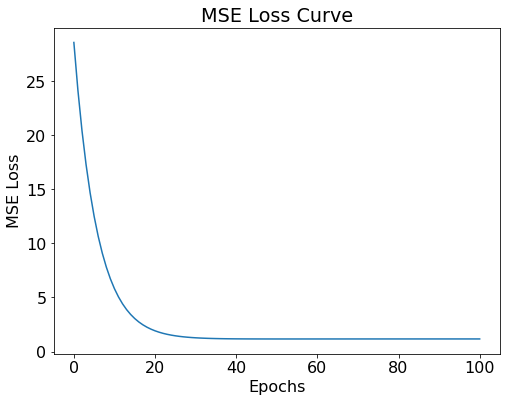

In [9]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': '16'})
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('MSE Loss Curve')

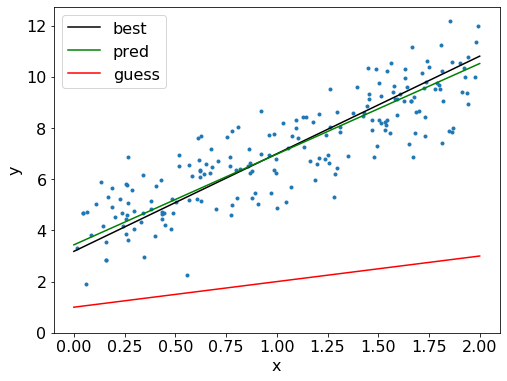

In [10]:
x_ = np.array([0, xscale])
y_ = m_best * x_ + b_best

pred = m.top[0, 0] * x_ + b.top[0]

plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': '16'})
plt.scatter(X, Y, marker='.')
plt.plot(x_, y_, c='k', label='best')
plt.plot(x_, pred, c='g', label='pred')
plt.plot(x_, guess, c='r', label='guess')
plt.ylim([0, None])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()